In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import glob
import pandas as pd
import scipy.optimize as sco
from scipy import stats
%matplotlib inline
path= ("C:/Users/yacine/Desktop/thesis/pred/gru")
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

In [2]:
all_files = glob.glob(os.path.join(path, "df_*.csv"))

In [3]:
all_df = []
for f in all_files:
    df = pd.read_csv(f, sep=',')
    all_df.append(df)


In [4]:
merged_df = pd.concat(all_df, sort=False, axis=1)
merged_df

,Unnamed: 0,AAPL_close_gru_pred,Unnamed: 0,AMGN_close_gru_pred,Unnamed: 0,AXP_close_gru_pred,Unnamed: 0,BA_close_gru_pred,Unnamed: 0,CAT_close_gru_pred,...,Unnamed: 0,UNH_close_gru_pred,Unnamed: 0,V_close_gru_pred,Unnamed: 0,VZ_close_gru_pred,Unnamed: 0,WBA_close_gru_pred,Unnamed: 0,WMT_close_gru_pred
0,0,28.795069,0,121.301490,0,72.995550,0,111.806130,0,65.816610,...,0,92.464380,0.0,71.665880,0,25.289007,0,53.531060,0,40.145220
1,1,28.950077,1,121.160710,1,72.623380,1,111.940580,1,63.723820,...,1,92.394325,1.0,70.988410,1,24.953037,1,53.310226,1,39.887050
2,2,29.040293,2,122.349030,2,73.126930,2,112.497350,2,66.987076,...,2,92.859150,2.0,70.005400,2,25.518229,2,53.617226,2,39.700764
3,3,29.025213,3,122.979675,3,73.263084,3,111.834580,3,65.817400,...,3,93.148470,3.0,70.160350,3,25.240845,3,53.629925,3,39.342804
4,4,28.914160,4,123.381190,4,74.040054,4,112.395065,4,67.328070,...,4,93.130646,4.0,69.961624,4,25.659967,4,54.061410,4,40.185210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,891,30.826120,891,133.937260,891,90.960075,891,119.949680,891,106.726610,...,891,102.417150,NaN,NaN,891,29.859840,891,48.310726,891,47.375230
892,892,30.867998,892,134.074070,892,90.861725,892,120.210860,892,106.021545,...,892,102.503130,NaN,NaN,892,30.036070,892,48.525295,892,47.139652
893,893,30.867332,893,133.870900,893,90.547930,893,120.246440,893,106.348480,...,893,102.458330,NaN,NaN,893,29.903536,893,48.204160,893,47.049385
894,894,30.914097,894,133.988740,894,91.010666,894,120.746260,894,106.485410,...,894,102.521040,NaN,NaN,894,30.171406,894,48.048325,894,47.166973


In [5]:
stock_pred=merged_df.drop(['Unnamed: 0'], axis = 1) 
stock_pred

,AAPL_close_gru_pred,AMGN_close_gru_pred,AXP_close_gru_pred,BA_close_gru_pred,CAT_close_gru_pred,CRM_close_gru_pred,CSCO_close_gru_pred,CVX_close_gru_pred,DIS_close_gru_pred,GS_close_gru_pred,...,MRK_close_gru_pred,MSFT_close_gru_pred,NKE_close_gru_pred,PG_close_gru_pred,TRV_close_gru_pred,UNH_close_gru_pred,V_close_gru_pred,VZ_close_gru_pred,WBA_close_gru_pred,WMT_close_gru_pred
0,28.795069,121.301490,72.995550,111.806130,65.816610,60.837803,19.255224,74.809944,83.559840,135.38780,...,35.197582,27.058094,42.705887,55.401608,83.269130,92.464380,71.665880,25.289007,53.531060,40.145220
1,28.950077,121.160710,72.623380,111.940580,63.723820,61.736618,19.164831,74.937860,83.659120,134.61750,...,34.135060,27.066576,42.820450,54.836174,83.227470,92.394325,70.988410,24.953037,53.310226,39.887050
2,29.040293,122.349030,73.126930,112.497350,66.987076,57.513720,19.055025,78.232680,83.770060,135.68170,...,35.604603,27.408413,43.019657,55.529522,83.342930,92.859150,70.005400,25.518229,53.617226,39.700764
3,29.025213,122.979675,73.263084,111.834580,65.817400,55.063316,19.194397,76.630180,83.859825,134.43597,...,35.893467,27.298744,43.179270,55.302444,83.312700,93.148470,70.160350,25.240845,53.629925,39.342804
4,28.914160,123.381190,74.040054,112.395065,67.328070,56.600680,19.383398,79.245580,83.975716,136.71250,...,36.861446,27.662508,44.387436,56.654610,83.458380,93.130646,69.961624,25.659967,54.061410,40.185210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,30.826120,133.937260,90.960075,119.949680,106.726610,NaN,37.571194,94.240350,83.713196,152.09781,...,51.538795,44.601288,52.659040,58.643936,91.054245,102.417150,NaN,29.859840,48.310726,47.375230
892,30.867998,134.074070,90.861725,120.210860,106.021545,NaN,37.497410,94.797935,84.029915,150.05405,...,53.343548,44.615158,52.833960,58.399788,90.841710,102.503130,NaN,30.036070,48.525295,47.139652
893,30.867332,133.870900,90.547930,120.246440,106.348480,NaN,37.738110,94.393845,84.208080,148.49673,...,52.226320,44.662933,52.922382,58.447247,90.984870,102.458330,NaN,29.903536,48.204160,47.049385
894,30.914097,133.988740,91.010666,120.746260,106.485410,NaN,38.062880,96.486020,84.240980,149.07736,...,53.858547,44.621040,52.926407,58.703102,90.992490,102.521040,NaN,30.171406,48.048325,47.166973


In [6]:
stocks=stock_pred.drop(['AAPL_close_gru_pred','AMGN_close_gru_pred','BA_close_gru_pred','CAT_close_gru_pred','CRM_close_gru_pred','GS_close_gru_pred','DIS_close_gru_pred','HD_close_gru_pred','HON_close_gru_pred','JNJ_close_gru_pred','JPM_close_gru_pred','MCD_close_gru_pred','MMM_close_gru_pred','MSFT_close_gru_pred','NKE_close_gru_pred','TRV_close_gru_pred','UNH_close_gru_pred','V_close_gru_pred','WBA_close_gru_pred'], axis = 1) 
stocks 

,AXP_close_gru_pred,CSCO_close_gru_pred,CVX_close_gru_pred,IBM_close_gru_pred,INTC_close_gru_pred,KO_close_gru_pred,MRK_close_gru_pred,PG_close_gru_pred,VZ_close_gru_pred,WMT_close_gru_pred
0,72.995550,19.255224,74.809944,98.40647,18.568678,22.165200,35.197582,55.401608,25.289007,40.145220
1,72.623380,19.164831,74.937860,98.04311,18.084880,22.327522,34.135060,54.836174,24.953037,39.887050
2,73.126930,19.055025,78.232680,100.37459,18.464855,22.302260,35.604603,55.529522,25.518229,39.700764
3,73.263084,19.194397,76.630180,101.00206,18.449920,22.012224,35.893467,55.302444,25.240845,39.342804
4,74.040054,19.383398,79.245580,102.99724,18.899403,22.311150,36.861446,56.654610,25.659967,40.185210
...,...,...,...,...,...,...,...,...,...,...
891,90.960075,37.571194,94.240350,93.52710,35.932404,26.602580,51.538795,58.643936,29.859840,47.375230
892,90.861725,37.497410,94.797935,92.76670,36.041996,26.710398,53.343548,58.399788,30.036070,47.139652
893,90.547930,37.738110,94.393845,92.93201,37.407710,26.807892,52.226320,58.447247,29.903536,47.049385
894,91.010666,38.062880,96.486020,94.58376,36.652424,26.859194,53.858547,58.703102,30.171406,47.166973


In [7]:
stock = ['AXP','CSCO','CVX','IBM','INTC','KO','MRK','PG','VZ','WMT']

In [8]:
def calc_portfolio_perf(weights, mean_returns, cov, rf):
    portfolio_return = np.sum(mean_returns * weights) * 252
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(cov, weights))) * np.sqrt(252)
    sharpe_ratio = (portfolio_return - rf) / portfolio_std
    return portfolio_return, portfolio_std, sharpe_ratio

def simulate_random_portfolios(num_portfolios, mean_returns, cov, rf):
    results_matrix = np.zeros((len(mean_returns)+3, num_portfolios))
    for i in range(num_portfolios):
        weights = np.random.random(len(mean_returns))
        weights /= np.sum(weights)
        portfolio_return, portfolio_std, sharpe_ratio = calc_portfolio_perf(weights, mean_returns, cov, rf)
        results_matrix[0,i] = portfolio_return
        results_matrix[1,i] = portfolio_std
        results_matrix[2,i] = sharpe_ratio
        #iterate through the weight vector and add data to results array
        for j in range(len(weights)):
            results_matrix[j+3,i] = weights[j]
            
    results_df = pd.DataFrame(results_matrix.T,columns=['ret','stdev','sharpe',stock[0],stock[1],stock[2],stock[3],stock[4],stock[5],stock[6],stock[7],stock[8],stock[9]])
        
    return results_df

In [9]:
mean_returns = stocks.pct_change().mean() 
cov = stocks.pct_change().cov()
num_portfolios = 50000
rf = 0.018

results_frame = simulate_random_portfolios(num_portfolios, mean_returns, cov, rf)

In [10]:
results_frame

,ret,stdev,sharpe,AXP,CSCO,CVX,IBM,INTC,KO,MRK,PG,VZ,WMT
0,0.138499,0.177996,0.676974,0.104207,0.098621,0.108048,0.012582,0.176697,0.055572,0.096826,0.132360,0.179679,0.035408
1,0.136624,0.170471,0.695859,0.175321,0.187123,0.142966,0.014955,0.077456,0.178810,0.055002,0.015305,0.015687,0.137375
2,0.127968,0.189270,0.581010,0.005631,0.077537,0.099255,0.169911,0.147614,0.088338,0.095064,0.064186,0.120279,0.132184
3,0.114303,0.175295,0.549378,0.164183,0.026006,0.147511,0.045006,0.039948,0.048527,0.185403,0.113601,0.094871,0.134944
4,0.152717,0.195880,0.687750,0.186969,0.029498,0.131725,0.000059,0.181717,0.035261,0.253268,0.045457,0.025888,0.110158
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.132248,0.185540,0.615758,0.044247,0.022590,0.031755,0.153937,0.185443,0.231983,0.210982,0.037839,0.022396,0.058829
49996,0.131897,0.170530,0.667901,0.112839,0.183440,0.023383,0.087858,0.088225,0.151985,0.131703,0.113572,0.009858,0.097138
49997,0.124907,0.169992,0.628892,0.117649,0.133211,0.098466,0.085386,0.096479,0.074379,0.107023,0.123862,0.135751,0.027794
49998,0.132107,0.166378,0.685827,0.115216,0.155007,0.062664,0.018975,0.139263,0.153874,0.028324,0.109079,0.140394,0.077205


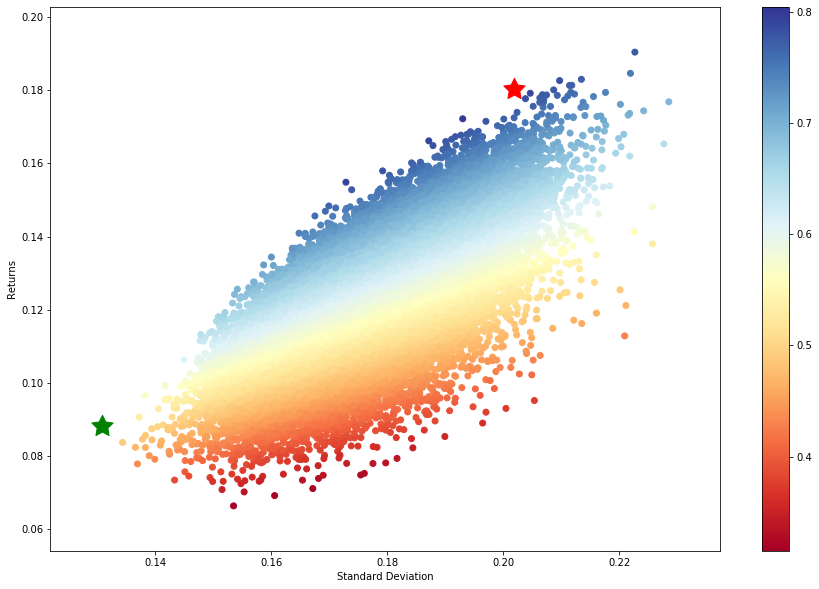

In [11]:
#locate position of portfolio with highest Sharpe Ratio
max_sharpe_port = results_frame.iloc[results_frame['sharpe'].idxmax()]
#locate positon of portfolio with minimum standard deviation
min_vol_port = results_frame.iloc[results_frame['stdev'].idxmin()]
#create scatter plot coloured by Sharpe Ratio
plt.subplots(figsize=(15,10))
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.xlabel('Standard Deviation')
plt.ylabel('Returns')
plt.colorbar()
#plot red star to highlight position of portfolio with highest Sharpe Ratio
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='r',s=500)
#plot green star to highlight position of minimum variance portfolio
plt.scatter(min_vol_port[1],min_vol_port[0],marker=(5,1,0),color='g',s=500)
plt.show()

In [12]:
max_sharpe_port.to_frame().T

,ret,stdev,sharpe,AXP,CSCO,CVX,IBM,INTC,KO,MRK,PG,VZ,WMT
11641,0.180439,0.201972,0.804266,0.065861,0.234422,0.029473,0.018995,0.249966,0.14898,0.150651,0.018463,0.004899,0.07829


In [13]:
min_vol_port.to_frame().T

,ret,stdev,sharpe,AXP,CSCO,CVX,IBM,INTC,KO,MRK,PG,VZ,WMT
37848,0.088198,0.130801,0.536679,0.236728,0.039563,0.010937,0.008881,0.064731,0.291269,0.062127,0.265751,0.008439,0.011575


In [14]:
def calc_portfolio_perf_VaR(weights, mean_returns, cov, alpha, days):
    portfolio_return = np.sum(mean_returns * weights) * days
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(cov, weights))) * np.sqrt(days)
    portfolio_var = abs(portfolio_return - (portfolio_std * stats.norm.ppf(1 - alpha)))
    return portfolio_return, portfolio_std, portfolio_var


def simulate_random_portfolios_VaR(num_portfolios, mean_returns, cov, alpha, days):
    results_matrix = np.zeros((len(mean_returns)+3, num_portfolios))
    for i in range(num_portfolios):
        weights = np.random.random(len(mean_returns))
        weights /= np.sum(weights)
        portfolio_return, portfolio_std, portfolio_VaR = calc_portfolio_perf_VaR(weights, mean_returns, cov, alpha, days)
        results_matrix[0,i] = portfolio_return
        results_matrix[1,i] = portfolio_std
        results_matrix[2,i] = portfolio_VaR
        #iterate through the weight vector and add data to results array
        for j in range(len(weights)):
            results_matrix[j+3,i] = weights[j]
            
    results_df = pd.DataFrame(results_matrix.T,columns=['ret','stdev','VaR',stock[0],stock[1],stock[2],stock[3],stock[4],stock[5],stock[6],stock[7],stock[8],stock[9]])
        
    return results_df

In [15]:
mean_returns = stocks.pct_change().mean()
cov = stocks.pct_change().cov()
num_portfolios = 50000
rf = 0.018
days = 252
alpha = 0.01

results_frame = simulate_random_portfolios_VaR(num_portfolios, mean_returns, cov, alpha, days)

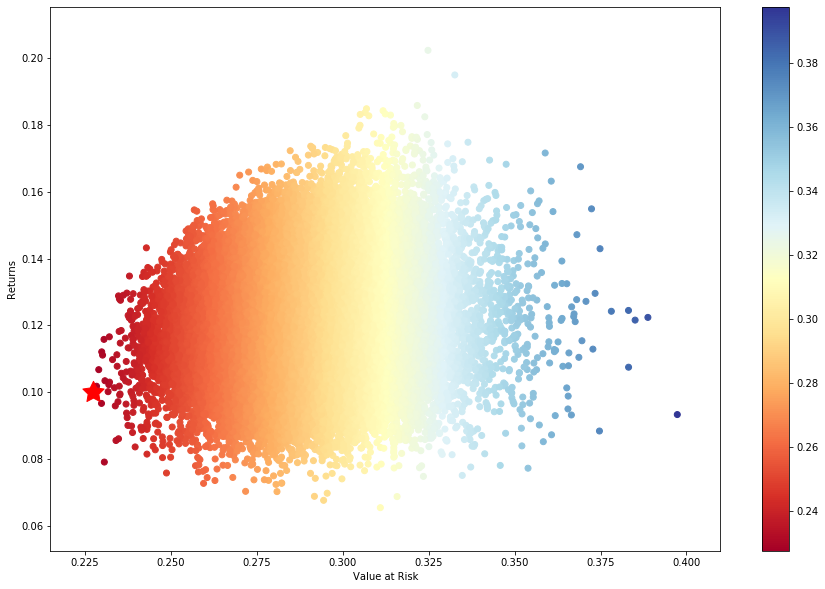

In [16]:
#locate positon of portfolio with minimum VaR
min_VaR_port = results_frame.iloc[results_frame['VaR'].idxmin()]
#create scatter plot coloured by VaR
plt.subplots(figsize=(15,10))
plt.scatter(results_frame.VaR,results_frame.ret,c=results_frame.VaR,cmap='RdYlBu')
plt.xlabel('Value at Risk')
plt.ylabel('Returns')
plt.colorbar()

#plot red star to highlight position of minimum VaR portfolio
plt.scatter(min_VaR_port[2],min_VaR_port[0],marker=(5,1,0),color='r',s=500)
plt.show()

In [17]:
min_VaR_port.to_frame().T

,ret,stdev,VaR,AXP,CSCO,CVX,IBM,INTC,KO,MRK,PG,VZ,WMT
3217,0.10012,0.140808,0.227447,0.274189,0.041749,0.035495,0.069061,0.084686,0.32583,0.051234,0.050208,0.050778,0.01677


In [18]:
def calc_portfolio_perf(weights, mean_returns, cov, rf):
    portfolio_return = np.sum(mean_returns * weights) * 252
    portfolio_std = np.sqrt(np.dot(weights, np.dot(cov, weights))) * np.sqrt(252)
    sharpe_ratio = (portfolio_return - rf) / portfolio_std
    return portfolio_return, portfolio_std, sharpe_ratio

def simulate_random_portfolios(num_portfolios, mean_returns, cov, rf):
    results_matrix = np.zeros((len(mean_returns)+3, num_portfolios))
    for i in range(num_portfolios):
        no_assets=10
        weights = [1/ no_assets for i in range (no_assets)]
        portfolio_return, portfolio_std, sharpe_ratio = calc_portfolio_perf(weights, mean_returns, cov, rf)
        results_matrix[0,i] = portfolio_return
        results_matrix[1,i] = portfolio_std
        results_matrix[2,i] = sharpe_ratio
        #iterate through the weight vector and add data to results array
        for j in range(len(weights)):
            results_matrix[j+3,i] = weights[j]
            
    results_df = pd.DataFrame(results_matrix.T,columns=['ret','stdev','sharpe',stock[0],stock[1],stock[2],stock[3],stock[4],stock[5],stock[6],stock[7],stock[8],stock[9]])
        
    return results_df

In [19]:
mean_returns = stocks.pct_change().mean()
cov = stocks.pct_change().cov()
num_portfolios = 50000
rf = 0.018


results_frame = simulate_random_portfolios(num_portfolios, mean_returns, cov, rf)

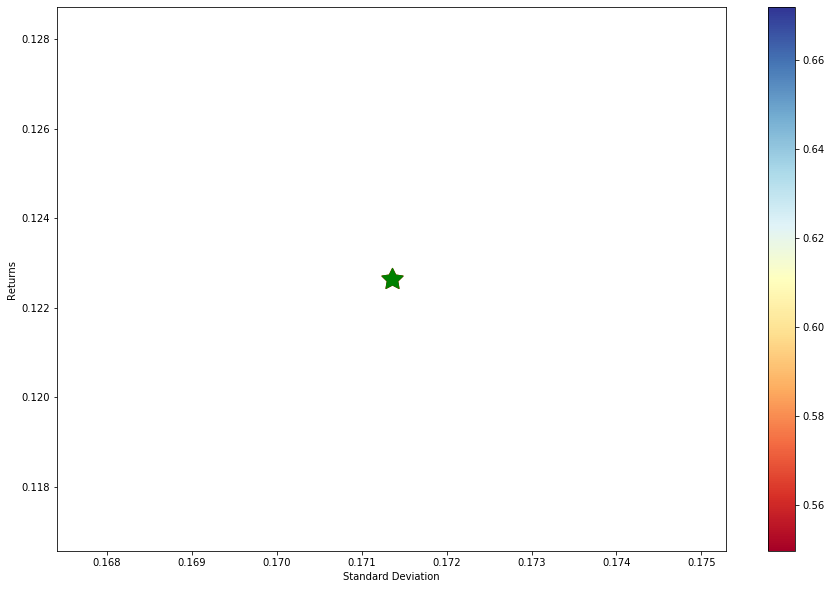

In [20]:
#locate position of portfolio with highest Sharpe Ratio
max_sharpe_port = results_frame.iloc[results_frame['sharpe'].idxmax()]
#locate positon of portfolio with minimum standard deviation
min_vol_port = results_frame.iloc[results_frame['stdev'].idxmin()]
#create scatter plot coloured by Sharpe Ratio
plt.subplots(figsize=(15,10))
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.xlabel('Standard Deviation')
plt.ylabel('Returns')
plt.colorbar()
#plot red star to highlight position of portfolio with highest Sharpe Ratio
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='r',s=500)
#plot green star to highlight position of minimum variance portfolio
plt.scatter(min_vol_port[1],min_vol_port[0],marker=(5,1,0),color='g',s=500)
plt.show()

In [21]:
min_vol_port.to_frame().T

,ret,stdev,sharpe,AXP,CSCO,CVX,IBM,INTC,KO,MRK,PG,VZ,WMT
0,0.122645,0.171352,0.610703,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1


In [22]:
def calc_portfolio_perf_VaR(weights, mean_returns, cov, alpha, days):
    portfolio_return = np.sum(mean_returns * weights) * days
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(cov, weights))) * np.sqrt(days)
    portfolio_var = abs(portfolio_return - (portfolio_std * stats.norm.ppf(1 - alpha)))
    return portfolio_return, portfolio_std, portfolio_var


def simulate_random_portfolios_VaR(num_portfolios, mean_returns, cov, alpha, days):
    results_matrix = np.zeros((len(mean_returns)+3, num_portfolios))
    for i in range(num_portfolios):
        no_assets=10
        weights = [1/ no_assets for i in range (no_assets)]
        weights /= np.sum(weights)
        portfolio_return, portfolio_std, portfolio_VaR = calc_portfolio_perf_VaR(weights, mean_returns, cov, alpha, days)
        results_matrix[0,i] = portfolio_return
        results_matrix[1,i] = portfolio_std
        results_matrix[2,i] = portfolio_VaR
        #iterate through the weight vector and add data to results array
        for j in range(len(weights)):
            results_matrix[j+3,i] = weights[j]
            
    results_df = pd.DataFrame(results_matrix.T,columns=['ret','stdev','VaR',stock[0],stock[1],stock[2],stock[3],stock[4],stock[5],stock[6],stock[7],stock[8],stock[9]])
        
    return results_df

In [23]:
mean_returns = stocks.pct_change().mean()
cov = stocks.pct_change().cov()
num_portfolios = 50000
rf = 0.018
days = 252
alpha = 0.01

results_frame = simulate_random_portfolios_VaR(num_portfolios, mean_returns, cov, alpha, days)

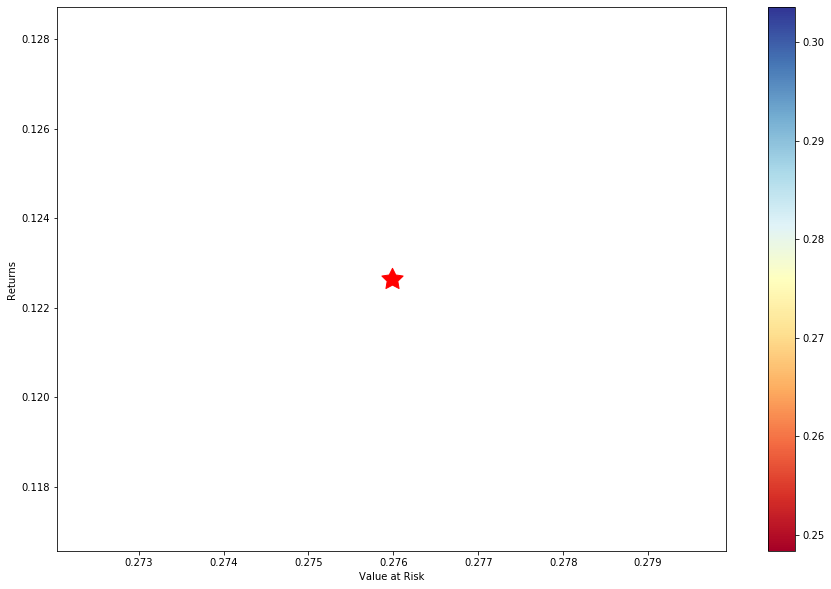

In [24]:
#locate positon of portfolio with minimum VaR
min_VaR_port = results_frame.iloc[results_frame['VaR'].idxmin()]
#create scatter plot coloured by VaR
plt.subplots(figsize=(15,10))
plt.scatter(results_frame.VaR,results_frame.ret,c=results_frame.VaR,cmap='RdYlBu')
plt.xlabel('Value at Risk')
plt.ylabel('Returns')
plt.colorbar()

#plot red star to highlight position of minimum VaR portfolio
plt.scatter(min_VaR_port[2],min_VaR_port[0],marker=(5,1,0),color='r',s=500)
plt.show()

In [25]:
min_VaR_port.to_frame().T

,ret,stdev,VaR,AXP,CSCO,CVX,IBM,INTC,KO,MRK,PG,VZ,WMT
0,0.122645,0.171352,0.27598,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
